In [1]:
# Import the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

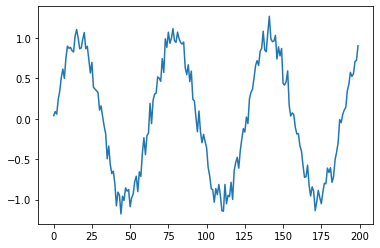

In [2]:
# Create the synthetic dataset
series = np.sin(0.1 * np.arange(200))
series = series + np.random.randn(200) * 0.1 # add noise

# plot ot
plt.plot(series)
plt.show();

In [3]:
# Try to use the last T values to predict the next value
T = 10
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T] # Get the set of T values
    X.append(x) # append those values into the dataset X
    y = series[t+T] # get the next value as the target
    Y.append(y) # add the target value to Y

In [4]:
# Cast the python lists into numpy arrays
X_arr = np.array(X).reshape(-1, T)
y_arr = np.array(Y)
N = len(X_arr)
print('X_arr shape:', X_arr.shape)
print('y_arr shape:', y_arr.shape)

X_arr shape: (190, 10)
y_arr shape: (190,)


In [5]:
# Split into train and test sets
# Don't use train_test_split
# Model needs to make predictions, to train set is the first half, and test set is the second half
# Can use points in between the train set for the test set
X_train = X_arr[:-N//2]
y_train = y_arr[:-N//2]
X_test = X_arr[-N//2:]
y_test = y_arr[-N//2:]

In [6]:
# Define the layers of the model
# This is a simple autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)

In [7]:
# Create the model
model = Model(i, x)

In [8]:
# Define how the model should be trained
model.compile(optimizer=Adam(lr=0.1),
              loss='mse')

In [9]:
# Train the mdoel
result = model.fit(x=X_train, y=y_train, # train on the first half of the dataset (don't use train_test_split)
                   epochs=100,
                   validation_data=(X_test, y_test)) # test on the second half of the dataset 

Train on 95 samples, validate on 95 samples
Epoch 1/100
95/95 [==============================] - 1s 7ms/sample - loss: 0.3853 - val_loss: 0.2673
Epoch 2/100
95/95 [==============================] - 0s 211us/sample - loss: 0.1722 - val_loss: 0.0656
Epoch 3/100
95/95 [==============================] - 0s 179us/sample - loss: 0.1270 - val_loss: 0.0685
Epoch 4/100
95/95 [==============================] - 0s 190us/sample - loss: 0.0673 - val_loss: 0.0655
Epoch 5/100
95/95 [==============================] - 0s 189us/sample - loss: 0.0874 - val_loss: 0.0486
Epoch 6/100
95/95 [==============================] - 0s 189us/sample - loss: 0.0517 - val_loss: 0.0555
Epoch 7/100
95/95 [==============================] - 0s 190us/sample - loss: 0.0690 - val_loss: 0.0433
Epoch 8/100
95/95 [==============================] - 0s 200us/sample - loss: 0.0506 - val_loss: 0.0399
Epoch 9/100
95/95 [==============================] - 0s 211us/sample - loss: 0.0499 - val_loss: 0.0264
Epoch 10/100
95/95 [===========

95/95 [==============================] - 0s 174us/sample - loss: 0.0155 - val_loss: 0.0197
Epoch 80/100
95/95 [==============================] - 0s 179us/sample - loss: 0.0156 - val_loss: 0.0201
Epoch 81/100
95/95 [==============================] - 0s 171us/sample - loss: 0.0159 - val_loss: 0.0199
Epoch 82/100
95/95 [==============================] - 0s 178us/sample - loss: 0.0161 - val_loss: 0.0197
Epoch 83/100
95/95 [==============================] - 0s 168us/sample - loss: 0.0160 - val_loss: 0.0199
Epoch 84/100
95/95 [==============================] - 0s 178us/sample - loss: 0.0158 - val_loss: 0.0204
Epoch 85/100
95/95 [==============================] - 0s 177us/sample - loss: 0.0159 - val_loss: 0.0206
Epoch 86/100
95/95 [==============================] - 0s 176us/sample - loss: 0.0161 - val_loss: 0.0199
Epoch 87/100
95/95 [==============================] - 0s 168us/sample - loss: 0.0155 - val_loss: 0.0202
Epoch 88/100
95/95 [==============================] - 0s 168us/sample - loss:

In [10]:
# Print the results
print("Train mse:", model.evaluate(x=X_train, y=y_train, verbose=0));
print("Test mse:", model.evaluate(x=X_test, y=y_test, verbose=0));

Train mse: 0.015436326084952606
Test mse: 0.020397655371772617


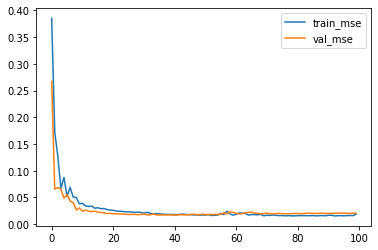

In [11]:
# Plot the cost function at each itteration
# Note: model.fit() returns an object that contains the history of the training process
plt.plot(result.history['loss'], label='train_mse');
plt.plot(result.history['val_loss'], label='val_mse');
plt.legend();

In [12]:
# Have a look at the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


We can see this is just a simple linear regression (10 dependent variables and 1 target variable)

### Wrong way to make forecasts
The wrong way is to use only actual values to make predictions. This is incorrect because if we wanted to forecast 10-steps ahead in the real world, we wouldn't have all the data leadning up to the 10th day, like we do in this training situation.

In [13]:
# create lists
validation_target = y_test
validation_predictions = []

# start index at 0
i = 0

# make predictions
while len(validation_predictions) < len(validation_target):
    # Every prediction is made using data that we have (test data). This is the wrong way to make predictions
    # For example, the firecast for day 20 uses actual data from days 10-19. We wouldn't have this data in a real-world setting
    prediction = model.predict(X_test[i].reshape(1, -1))[0,0] # need to reshape for to get it into the right format
    i += 1
    
    # update the predictions list
    validation_predictions.append(prediction)

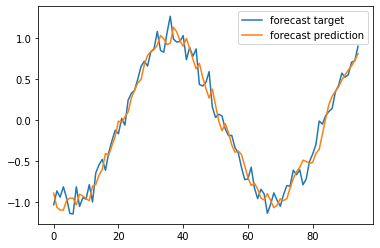

In [14]:
# plot predicted vs actual test data
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend();

This looks very good, but is measlieading because it uses known data that we wouldn't have a real-world situation. i.e. In the real world, if we want to predict 20 steps ahead, we wouldn't have data from days 1-19. But the method of forecasting above uses actual data from days 10-19 to make predictions for day 20. 

Also, this doesn't make much sense since it's saying that the prediction for 100-days away is just as accurate as the prediction for tomorrow.

### Right way to make forecasts
The right way is to use predicted data (instead of actual data) for multi-step forecasts.

In [15]:
# create the lists
validation_target = y_test
data_for_next_prediction = X_test[0]
validation_predictions = []

# start index at 0
i = 0

# make predictions
while len(validation_predictions) < len(validation_target):
    # Make prediction using available data (including predicted data)
    prediction = model.predict(data_for_next_prediction.reshape(1,-1))[0,0] # need to reshape for to get it into the right format
    
    # Use the last 10 data points for the next prediction
    data_for_next_prediction = np.roll(data_for_next_prediction, -1)
    data_for_next_prediction[-1] = prediction
    
    # Add prediction to set of predictions
    validation_predictions.append(prediction)

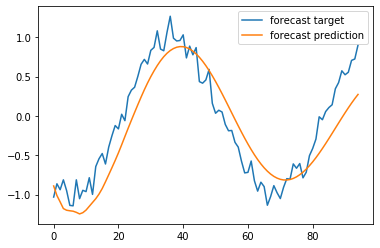

In [16]:
# plot predicted vs actual test data
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend();

This is less accurate, but makes more since since it shows that the prediction for 100-days away is less accurate than the prediction for the next 20 days.

It also shows that the model was able to learn the underlying shape of the model used to create the data.